In [1]:
#gradient boosting with sklearn
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#load the data
df = pd.read_csv("Resources/diabetes_data_cleaned.csv")





In [2]:
#split the data
X = df.drop("DiabetesDiagnosis", axis=1)
y = df["DiabetesDiagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [3]:
#create the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#fit the model
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_test)

#evaluate the model
print(classification_report(y_test, y_pred))

#print the accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")



              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy: 0.752


In [4]:
from sklearn.model_selection import cross_val_score

# Cross-validate
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.7410708  0.74870924 0.75130853 0.75682558 0.75420852]
Mean Accuracy: 0.7504245327480404


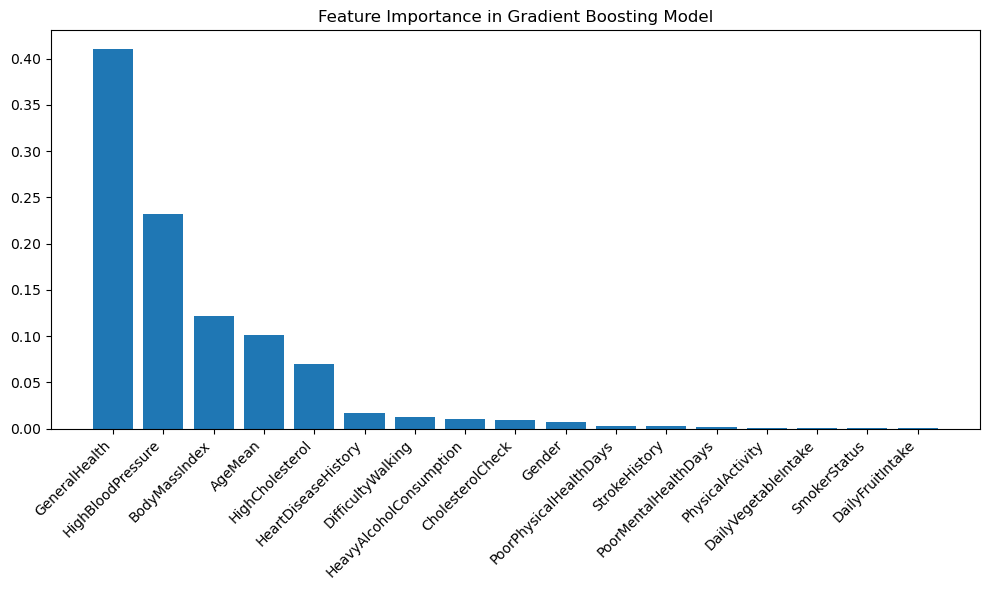

In [5]:
import matplotlib.pyplot as plt
#plotting the importance of features

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Gradient Boosting Model')
plt.tight_layout()
plt.show()

In [6]:
#drop the least important features
#drop by column name
drop_list = ['DailyFruitIntake', 'SmokerStatus', 'DailyVegetableIntake','PhysicalActivity','PoorMentalHealthDays','StrokeHistory', 'PoorPhysicalHealthDays']

X_train_reduced = X_train.drop(columns=drop_list)
X_test_reduced = X_test.drop(columns=drop_list)

#fit the model
model.fit(X_train_reduced, y_train)

#predict the model
y_pred = model.predict(X_test_reduced)

#evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



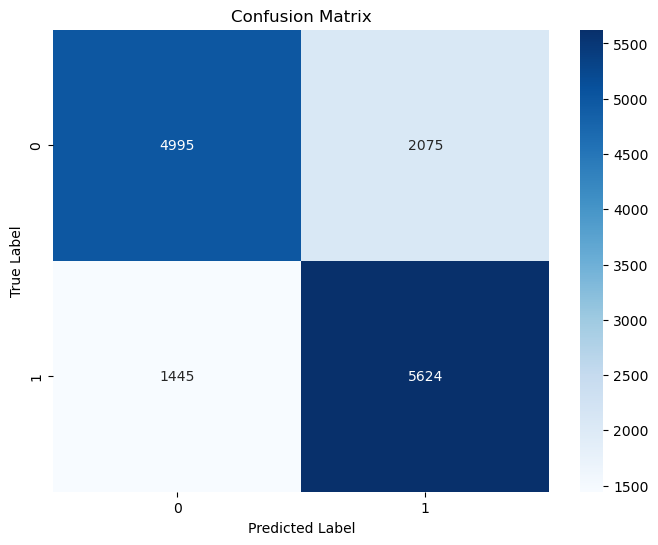

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

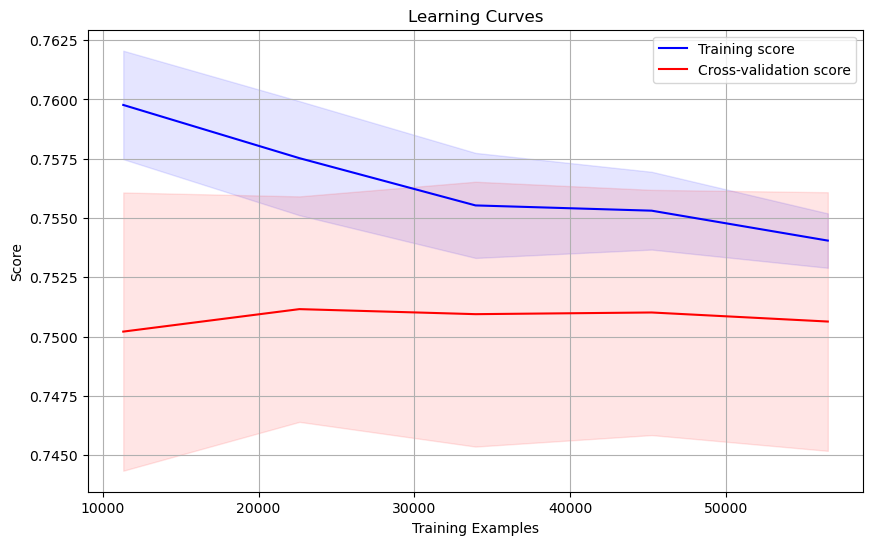

In [8]:
import numpy as np
from sklearn.model_selection import learning_curve

# Learning Curves with stratification
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, 
    cv=5,
    n_jobs=-1, 
    train_sizes=np.linspace(0.2, 1.0, 5),  # Start from 20% of data
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The learning curve graph above shows how well our model learns as we give it more training data. 


 The blue line is training score, and the orange line is the cross-validation score. Shaded areas represent the standard deviation of the scores. Training score start high and slightly decreases as training examples increase (the x-axis). Cross-validation score starts low and increases as training examples increase. 

The small gap between the training score and cross-validation score indicates that the model is not overfitting. The model is generalizing well to new, unseen data. However, it shows that adding more data will not improve the model's performance. Instead we need to improve the model's performance by tuning the hyperparameters, or increasing the complexity of the model with something like ensemble (pairing models together).


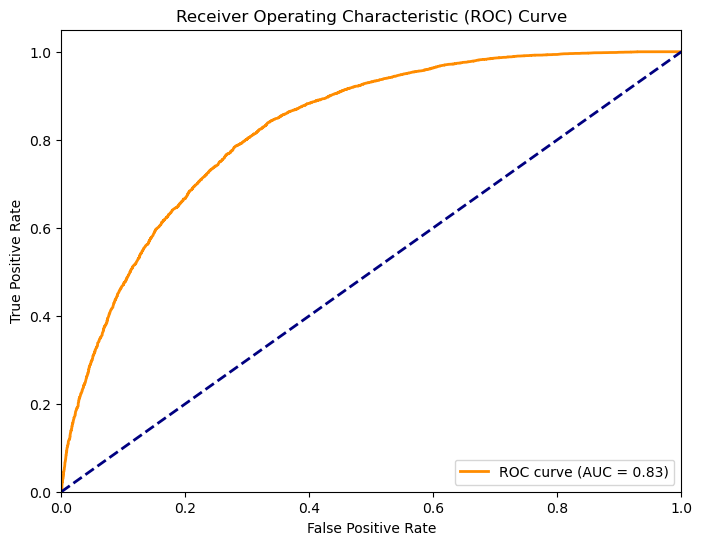

In [10]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
y_pred_proba = model.predict_proba(X_test_reduced)[:,1]  
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

This grapph shows how well our model preforms at distinguishing between people with and without diabetes. Our model has an AUC of 0.83, which is good. 

Orange line is our models performance, and blue line represents randomly guessing (think 50/50 coin flips). The higher our orange line is, the better our model is performing. An AUC of .83 means our model has an 83% chance of correctly ranking a random positive case higher than a random negative case. Or another way to say it, is 83 out of 100 times, our model will correctly identify a person with diabetes as having diabetes. We still can have false positives and false negatives.

